      hostname       os   enviroment  country  node
0       HPDEU1    HP-UX   Production  Germany     1
1       SPFRA2  Solaris   Production   France     2
2       ASITA3      AIX      Staging    Italy     3
3       SSITA4  Solaris      Staging    Italy     4
4       SPESP5  Solaris   Production    Spain     5
...        ...      ...          ...      ...   ...
1495  SSDEU497  Solaris      Staging  Germany   497
1496  ADDEU498      AIX  Development  Germany   498
1497  SSITA499  Solaris      Staging    Italy   499
1498  LPNOR500    Linux   Production   Norway   500
1499  AIITA501      AIX  Integration    Italy   501

[1500 rows x 5 columns]
Hosts_DF:        hostname,os,enviroment,country,node
0        HPDEU1,HP-UX,Production,Germany,1
1       SPFRA2,Solaris,Production,France,2
2               ASITA3,AIX,Staging,Italy,3
3           SSITA4,Solaris,Staging,Italy,4
4        SPESP5,Solaris,Production,Spain,5
...                                    ...
1495  SSDEU497,Solaris,Staging,Germany,4

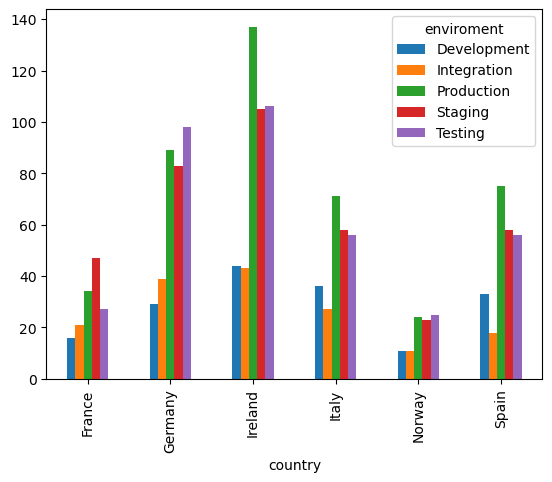

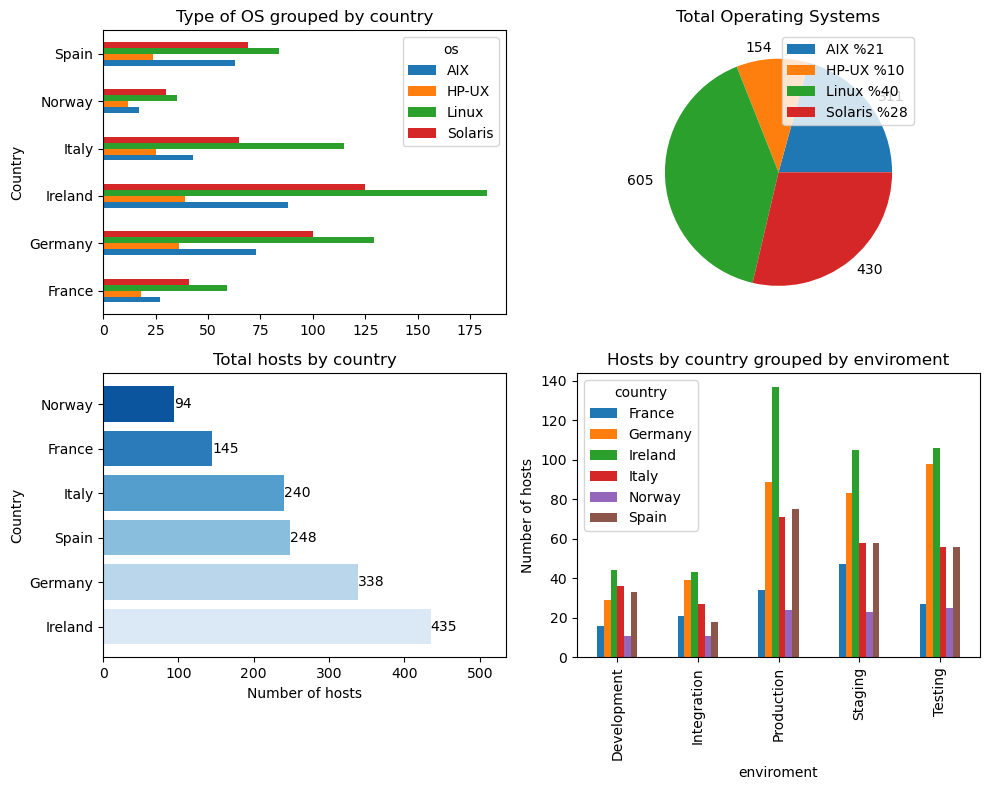

In [16]:
import matplotlib.pyplot as plt, pandas as pd
import seaborn as sns
import random


number_of_hosts=0
letras_servidor = ['L', 'S', 'A', 'H']
letras_entorno=['D', 'I', 'T', 'S','P']
pais=['NOR','FRA','ITA','ESP','DEU','IRL']
df= None
dataset={"hostname":[],"os":[],"enviroment":[],"country":[],"node":[]}

def set_hostnames(number_of_hosts):
    num_nodo=0
    #genera el hostname las veces indicadas al llamar a la funcion
    for x in range(number_of_hosts):
        
        primer_caracter = ''.join(random.choices(letras_servidor, weights=(40,30,20,10), k=1))
        segundo_caracter = ''.join(random.choices(letras_entorno, weights=(10,10,25,25,30), k=1))
        tercer_caracter = ''.join(random.choices(pais, weights=(6,9,16,16,23,30), k=1))
        #cuando el nodo alcanze el valor 999 volvera a zero
        if num_nodo==999:
            num_nodo=0  
        num_nodo+=1
        
        hostname=primer_caracter+segundo_caracter+tercer_caracter+str(num_nodo)
        
        dataset["hostname"].append(hostname)
        #llama a la funcion get_os e imprime el resultado
        os=get_os(hostname)
        
        dataset["os"].append(os)
        #llama a la funcion get_enviroment e imprime el resultado
        entorno=get_enviroment(hostname)
      
        dataset["enviroment"].append(entorno)
        #llama a la funcion get_country e imprime el resultado
        country=get_country(hostname)
       
        dataset["country"].append(country)
        #anade el nodo al diccionario dataset
        dataset["node"].append(num_nodo)
        
def get_os(hostname):
    
    try:
        if hostname[0] == 'L':
            return 'Linux'
        elif hostname[0] == 'S':
            return 'Solaris'
        elif hostname[0] == 'A':
            return 'AIX'
        elif hostname[0] == 'H':
            return 'HP-UX'
    except ValueError:
        return 'Unknow'

def get_enviroment(hostname):
    
    try:
        if hostname[1] == 'D':
            return 'Development'
        elif hostname[1] == 'I':
            return 'Integration'
        elif hostname[1] == 'T':
            return 'Testing'
        elif hostname[1] == 'S':
            return 'Staging'
        elif hostname[1] == 'P':
            return 'Production'
    except ValueError:
        return 'Unknow'
    
def get_country(hostname):
    
    try:
        if hostname[2] == 'N' and hostname[3] == 'O' and hostname[4] == 'R':
            return 'Norway'
        elif hostname[2] == 'D' and hostname[3] == 'E' and hostname[4] == 'U':
            return 'Germany'
        elif hostname[2] == 'I' and hostname[3] == 'T' and hostname[4] == 'A':
            return 'Italy'
        elif hostname[2] == 'E' and hostname[3] == 'S' and hostname[4] == 'P':
            return 'Spain'
        elif hostname[2] == 'I' and hostname[3] == 'R' and hostname[4] == 'L':
            return 'Ireland'
        elif hostname[2] == 'F' and hostname[3] == 'R' and hostname[4] == 'A':
            return 'France'
    except ValueError:
        return 'Unknow'
#7  
def set_dataframe(count):
    global df
    set_hostnames(count)
    df = pd.DataFrame(dataset)
    
    
    
#8
set_dataframe(1500)
print(df)
#9
df.to_csv(
    'hosts.csv',
    header=True,
    index=False
)

hosts_df = pd.read_csv(
    r'hosts.csv',
    encoding='ISO-8859-1',
    delimiter=';'
)
print('Hosts_DF:',hosts_df)
#10

paises=df.groupby(['enviroment', 'country']).size()
paises.unstack(0).plot(kind='bar')
plt.show()

#11
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#grafico superior izquierdo

os_by_country=df.groupby(['os', 'country']).size()
os_by_country_unstacked = os_by_country.unstack(0)
os_by_country_unstacked.plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')
axs[0, 0].set_ylabel('Country')

#grafico superior derecha

oses = df['os']
contador_os=len(oses)
oses=df.groupby(['os']).size()
osAIX=oses['AIX']
osHP=oses['HP-UX']
osLinux=oses['Linux']
osSolaris=oses['Solaris']
#calcula el porcentaje de cada OS y los pone en la leyenda del pie chart
sistemas   = ['AIX', 'HP-UX', 'Linux', 'Solaris']
nombresOS = [osAIX, osHP, osLinux, osSolaris]
porcentaje_sistemas=[]
for e, t in zip(sistemas, nombresOS):
    porcentaje_sistemas.append(f'{e} %{round(t*6.6/100)}')

axs[0, 1].pie(oses, labels=[osAIX, osHP, osLinux,osSolaris])
axs[0, 1].legend(porcentaje_sistemas,loc="upper right")
axs[0, 1].set_title('Total Operating Systems')

#grafico inferior izquierdo

host_by_country=df['country'].value_counts()

countries = ('Ireland', 'Germany', 'Spain', 'Italy', 'France','Norway')
palette = sns.color_palette("Blues")
barras = axs[1, 0].barh(countries,host_by_country,color=palette)
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_title('Total hosts by country')

#creo una variable con los valores value_count() para anadirlos a la derecha de cada barra
valores_hosts = host_by_country.values
axs[1, 0].set_xlim(0,df['country'].value_counts().max() + 100)
contador=0
for bar in barras:
    yval = bar.get_y() + bar.get_height() / 2
    xval = bar.get_width()
    axs[1, 0].text(xval, yval,valores_hosts[contador], ha='left', va='center', color='black')
    contador+=1

#grafico inferior derecho

os_by_country=df.groupby(['country', 'enviroment']).size()
os_by_country_unstacked = os_by_country.unstack(0)
os_by_country_unstacked.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by enviroment')
axs[1, 1].set_ylabel('Number of hosts')


#ajusta y muestra los 4 graficos
fig.tight_layout()
plt.show()